# Airline data visualisation project

## Import of libraries 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import of data and inspection

In [58]:
flight = pd.read_csv(r"C:\Users\pjhop\OneDrive\Documents\Programming & Coding\Python\Projects\Datasets\flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [59]:
flight.shape

(129780, 12)

In [60]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [61]:
flight.isnull().sum()

miles                     0
passengers                0
delay                     0
inflight_meal             0
inflight_entertainment    0
inflight_wifi             0
day_of_week               0
redeye                    0
weekend                   0
coach_price               0
firstclass_price          0
hours                     0
dtype: int64

In [62]:
# This is mapping relevant for the violin plot later in the project
day_category = {'Monday':'Off Peak', 'Tuesday':'Off Peak', 'Wednesday':'Off Peak', 'Thursday':'Off Peak', 
                'Friday':'Peak', 'Saturday':'Peak', 'Sunday':'Peak'}

flight['Day Category'] = flight['day_of_week'].map(day_category)

## Visualizing the price distribution of flights

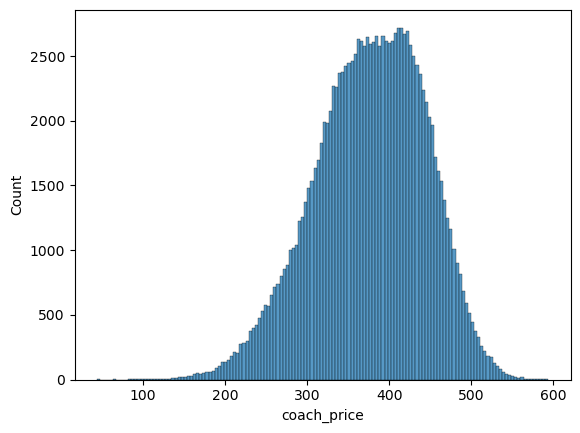

<Figure size 640x480 with 0 Axes>

In [63]:
sns.histplot(flight.coach_price)
plt.show()
plt.clf()

From this histogram we can see that our distribution is skewed to the left and a mean of around four hundred. However, this doesn't take into account the length of the flight which could be a key determining factor in price. 

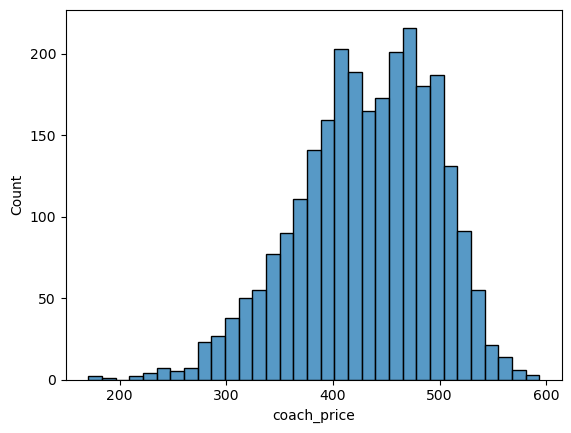

<Figure size 640x480 with 0 Axes>

In [64]:
sns.histplot(flight.coach_price[flight.hours >= 8])
plt.show()
plt.clf()

When looking at this distribution, we can see the average price is higher at around four hundred and fifty. Once again, the distribution is skewed to the left.

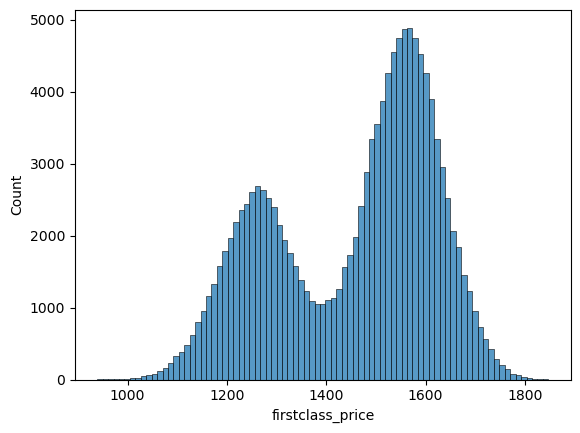

<Figure size 640x480 with 0 Axes>

In [65]:
sns.histplot(flight.firstclass_price)
plt.show()
plt.clf()

When looking at the distribution of the first class price, we can see there is a bimodal distribution with two peaks at around 1250 and 1575 dollars. 

## Comparing the relationship between ticket price and the first class price

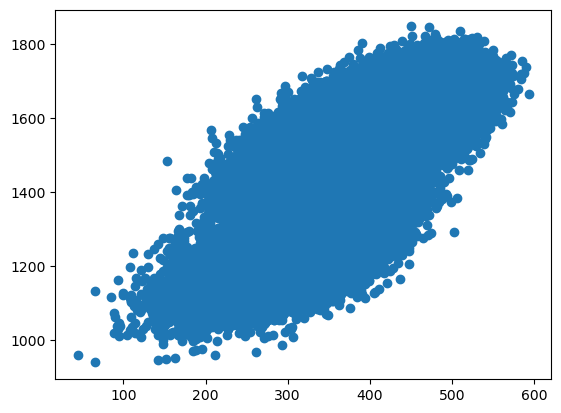

<Figure size 640x480 with 0 Axes>

In [66]:
plt.scatter(flight.coach_price, flight.firstclass_price)
plt.show()
plt.clf()

When we use a plt scatter function we can see that there are too many datapoints which leads to a poor readability of the data. In the next section we consider how we can improve the visualization using opacity and size parameters in the function.

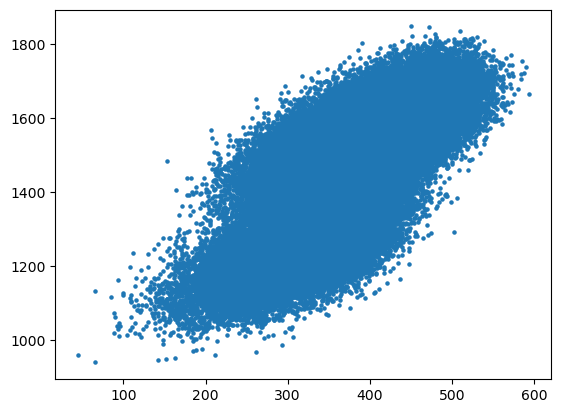

<Figure size 640x480 with 0 Axes>

In [67]:
plt.scatter(flight.coach_price, flight.firstclass_price, s=5, alpha=1)
plt.show()
plt.clf()

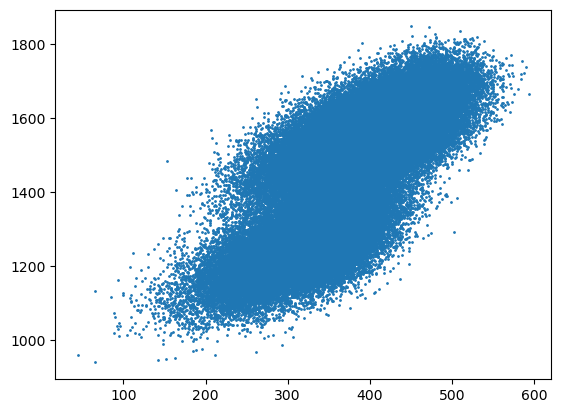

<Figure size 640x480 with 0 Axes>

In [68]:
plt.scatter(flight.coach_price, flight.firstclass_price, s=1, alpha=1)
plt.show()
plt.clf()

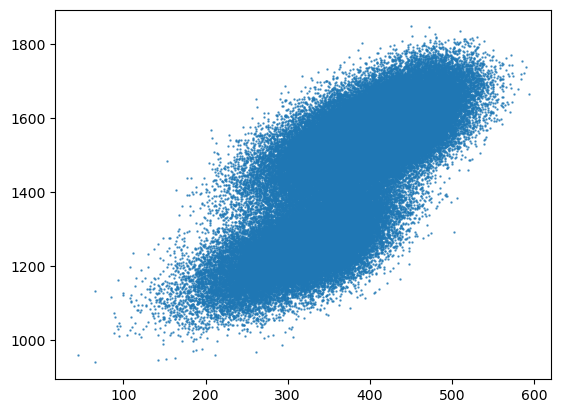

<Figure size 640x480 with 0 Axes>

In [69]:
plt.scatter(flight.coach_price, flight.firstclass_price, s=0.5, alpha=0.75)
plt.show()
plt.clf()

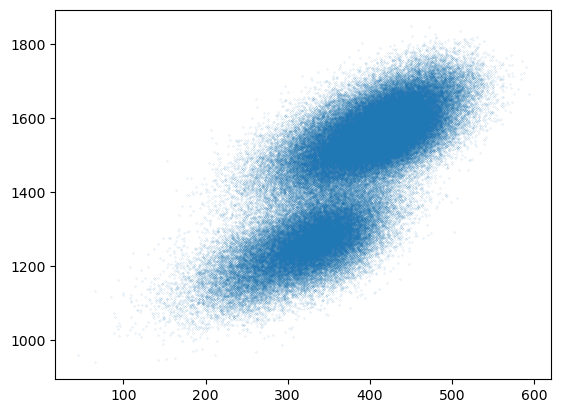

<Figure size 640x480 with 0 Axes>

In [70]:
plt.scatter(flight.coach_price, flight.firstclass_price, s=0.01, alpha=0.75)
plt.show()
plt.clf()

We can see that using the size and opacity parameters does improve the visualization, however there are a few drawbacks to be considered; the individual datapoints are now much harder to interpret, in particular the outliers become much more difficult to interpret.

Below, we show how sampling and a LOWESS curve can be used to help improve the readability and deal with the noise in the data.

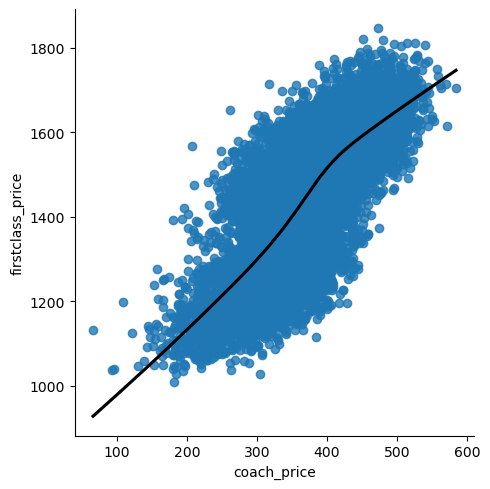

<Figure size 640x480 with 0 Axes>

In [71]:
flight_sample = flight.sample(n=12978, random_state=100)
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight_sample, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

Taking a random sample from a large dataset is a useful technique to speed up the process of generating a plot or performing statistical analysis. This was an issue when I first ran the code, however now the memory usage and performance requirements are reduced, the issues are resolved.

In the lmplot, we use a **LOWESS** curve which helps to deal with the noise produced from such a large number of datapoints, this allows us to better draw conclusions from our data. The **LOWESS** curves works by:
* Fitting a polynomial model for each datapoint in a small neighborhood in our data, the size of the neighborhood is determined by a smoothing parameter, which determines the degree of smoothing.
* The polynomial function is then weighted, with more weight given to points closer to the datapoint and vice versa. This weighting is often done with a kernel function.
* The weighted polynomial model is then used to estimate the value of the dependent variable at the point being estimated. This process is repeated for all points in the dataplot giving us a smooth line represent the true trend in the data.


## Comparing prices for flight with inflight wifi, entertainment and meal options

In this section, we use a series of boxplots to show how the price differs depending on the available inflight options.

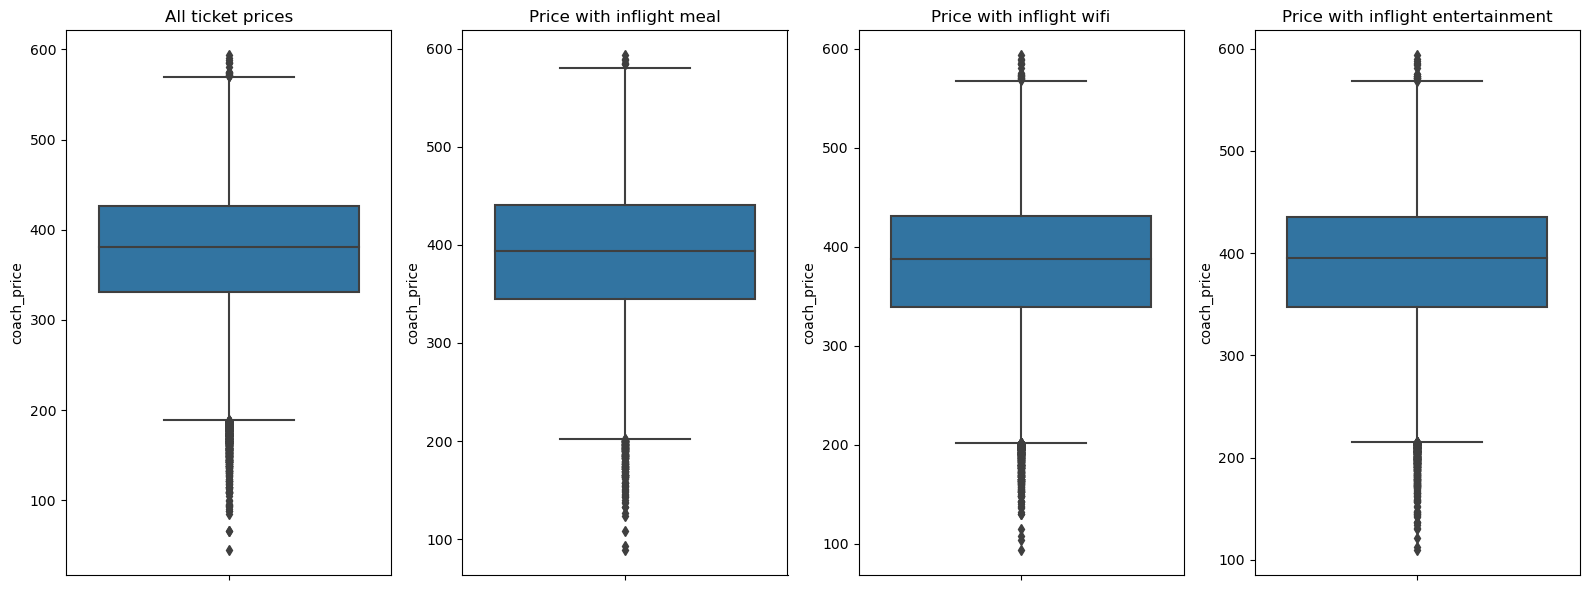

<Figure size 640x480 with 0 Axes>

In [73]:
#Creating datasets
yes_meal = flight[flight["inflight_meal"] == "Yes"]
yes_wifi = flight[flight["inflight_wifi"] == "Yes"]
yes_entertainment = flight[flight["inflight_entertainment"] == "Yes"]

#Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

#First boxplot
sns.boxplot(y='coach_price', data=flight, ax=axes[0])
axes[0].set_title('All ticket prices')

#Second boxplot
sns.boxplot(y='coach_price', data=yes_meal, ax=axes[1])
axes[1].set_title('Price with inflight meal')

#Third boxplot
sns.boxplot(y='coach_price', data=yes_wifi, ax=axes[2])
axes[2].set_title('Price with inflight wifi')

#Final boxplot
sns.boxplot(y='coach_price', data=yes_entertainment, ax=axes[3])
axes[3].set_title('Price with inflight entertainment')

plt.tight_layout() # Adjusts subplots to make more appealing
plt.show()
plt.clf()

When comparing the boxplots, we can see that all inflight amenities seem to have a small price premium, with inflight entertainment seemingly having the greatest premium. Despite this, they seem to only cost around 20 dollars more and these amenities could be included due to other relevant factors, such as the length of the flight. 

## Relationship between length of the flight and the number of passengers

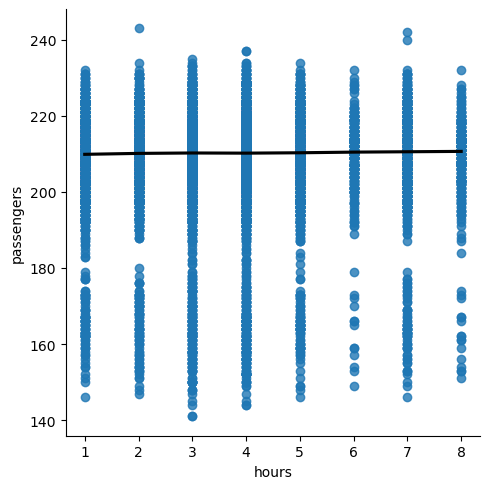

<Figure size 640x480 with 0 Axes>

In [74]:
sns.lmplot(x='hours', y='passengers', data=flight_sample, line_kws={'color':'black'}, lowess=True)
plt.show()
plt.clf()

When looking using a scatterplot we can see that there are too many variables in the same place on the graph, with many sharing the same hours value. We now use a hexbin plot to help us better visualize the data.

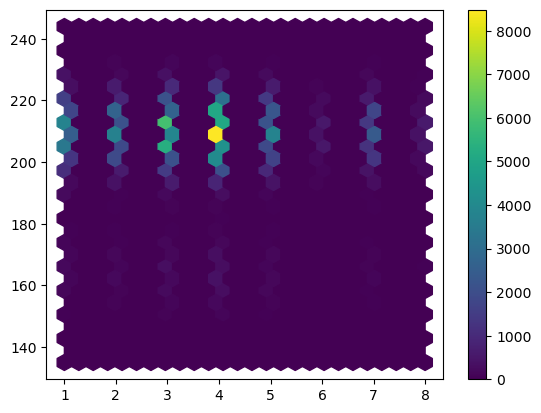

<Figure size 640x480 with 0 Axes>

In [75]:
#Hexbin plot
plt.hexbin(x=flight["hours"], y=flight["passengers"], gridsize=25, cmap="viridis")

#Add colorbar
plt.colorbar()

#Display data
plt.show()
plt.clf()

Our hexbin plot does help to reduce the noise, we can see more clearly the density of our datapoints. The color scheme used also allows us to pick up subtle changes at the 160 passenger mark for hours 2-5.

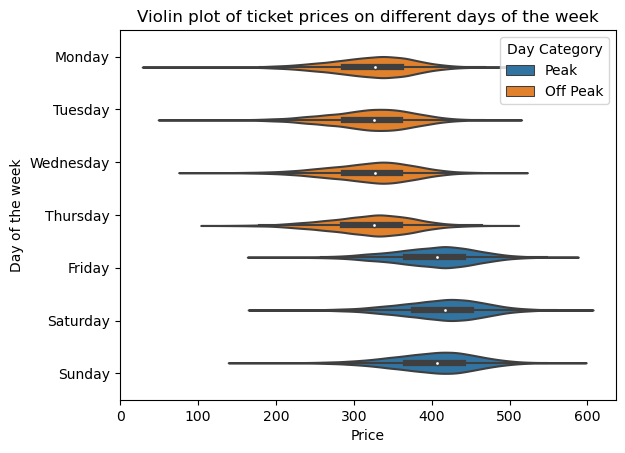

<Figure size 640x480 with 0 Axes>

In [77]:
#Violin plt
sns.violinplot(x='coach_price', y='day_of_week', hue='Day Category', data=flight, order=['Monday', 'Tuesday', 'Wednesday',
                                                                                        'Thursday', 'Friday', 'Saturday',
                                                                                        'Sunday'])

#Titles and labels
plt.title('Violin plot of ticket prices on different days of the week')
plt.xlabel('Price')
plt.ylabel('Day of the week')

#Display command
plt.show()
plt.clf()

There are peak and off-peak periods for prices, with prices generally 80-90 dollars higher in the peak period. Prices remain relatively stable in the off-peak and peak period, other than a small increase in price on Saturday. Prices are lower for outliers at the bottom of the distribution in the beginning of the week, and then increase towards the peak periods. Although, they decrease again on Sunday as we head towards the off-peak period.